In [5]:
import numpy as np # linear algebra
import pandas as pd 

In [8]:
df=pd.read_csv("rideshare_kaggle.csv")

In [10]:
no=df.shape[1]

In [11]:
no

57

In [12]:
data_train = df.copy()

In [13]:
df = df.drop(['id', 'datetime', 'timezone', 'timestamp','long_summary'], axis=1)

In [14]:
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 78063


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.isnull().sum()

hour                               0
day                                0
month                              0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          32942
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
temperatureHigh                    0
temperatureHighTime                0
temperatureLow                     0
temperatureLowTime                 0
a

In [17]:
total = df.isnull().sum().sort_values(ascending=False)
percentage= df.isnull().sum()/df.isnull().count()*100
missing_data = pd.concat([total, percentage], axis=1, keys=['Total Missing Values', 'Percentage'])
missing_data

,Total Missing Values,Percentage
price,32942,5.356353
hour,0,0.000000
sunriseTime,0,0.000000
apparentTemperatureLow,0,0.000000
apparentTemperatureLowTime,0,0.000000
icon,0,0.000000
dewPoint,0,0.000000
pressure,0,0.000000
windBearing,0,0.000000
cloudCover,0,0.000000


In [18]:
mean_value = round(df['price'].mean(),2)
print('Filling Price with mean value of', mean_value)
df['price'].fillna(value=mean_value, inplace=True)

Filling Price with mean value of 16.77


In [19]:
import matplotlib.pyplot as plt

In [20]:
numeric_cols = df.columns[df.dtypes != object]
categorical_cols = df.columns[df.dtypes == object]

In [21]:
len(numeric_cols)

45

In [22]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df [field_name], 75)) ].index, inplace=True) 
    df.drop(df[df[field_name] < (np.percentile(df [field_name], 25) - iqr)].index, inplace=True)

In [23]:
df.columns

Index(['hour', 'day', 'month', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'price', 'distance', 'surge_multiplier',
       'latitude', 'longitude', 'temperature', 'apparentTemperature',
       'short_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
       'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
      dtype='object

In [24]:
mis = (df['visibility'] == df['visibility.1']).all()
mis

True

In [25]:
(df['temperatureHigh'] == df['temperatureMax']).all()

False

In [26]:
(df['apparentTemperatureHigh'] == df['apparentTemperatureMax']).all()

False

In [27]:
df = df.drop(['visibility.1', 'temperatureMax','apparentTemperatureMax'], axis=1)

In [28]:
cab_type = df['cab_type'].value_counts()
cab_type

cab_type
Uber    321948
Lyft    293060
Name: count, dtype: int64

In [29]:
df.groupby(['cab_type', 'name'])['price'].sum().sort_values(ascending=False)

cab_type  name        
Lyft      Lux Black XL    1605626.55
Uber      Black SUV       1491798.50
Lyft      Lux Black       1127057.55
Uber      Black           1016954.50
Lyft      Lux              866901.50
Uber      UberXL           783380.50
Lyft      Lyft XL          748207.70
Uber      Taxi             552437.34
Lyft      Lyft             471058.68
Uber      UberX            463685.50
          WAV              462920.50
          UberPool         427561.50
Lyft      Shared           295998.50
Name: price, dtype: float64

In [30]:
avg_distance = df.groupby(['cab_type', 'name'])['distance'].mean().reset_index()
avg_distance

,cab_type,name,distance
0,Lyft,Lux,2.199370
1,Lyft,Lux Black,2.214477
2,Lyft,Lux Black XL,2.198090
3,Lyft,Lyft,2.210368
4,Lyft,Lyft XL,2.192788
5,Lyft,Shared,2.191617
6,Uber,Black,2.250741
7,Uber,Black SUV,2.250631
8,Uber,Taxi,2.236304
9,Uber,UberPool,2.219555


In [31]:
cab_hour = df.groupby(['cab_type'])['hour'].value_counts().reset_index()
cab_hour[cab_hour['cab_type'] == 'Uber'].sort_values(by= ['hour'])

,cab_type,hour,count
25,Uber,0,14480
41,Uber,1,13021
36,Uber,2,13388
40,Uber,3,13054
38,Uber,4,13147
46,Uber,5,11854
39,Uber,6,13115
45,Uber,7,11903
47,Uber,8,11506
35,Uber,9,13553


In [32]:
cab_hour[cab_hour['cab_type'] == 'Lyft'].sort_values(by= 'hour')

,cab_type,hour,count
0,Lyft,0,13911
13,Lyft,1,11998
17,Lyft,2,11919
18,Lyft,3,11654
14,Lyft,4,11974
21,Lyft,5,10726
19,Lyft,6,11493
22,Lyft,7,10610
23,Lyft,8,10289
12,Lyft,9,12378


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
f_corr = ['hour', 'day', 'month', 'windGustTime', 'temperatureHighTime',
          'temperatureLowTime', 'apparentTemperatureHighTime','price']
cor = df[f_corr].corr()

<Axes: >

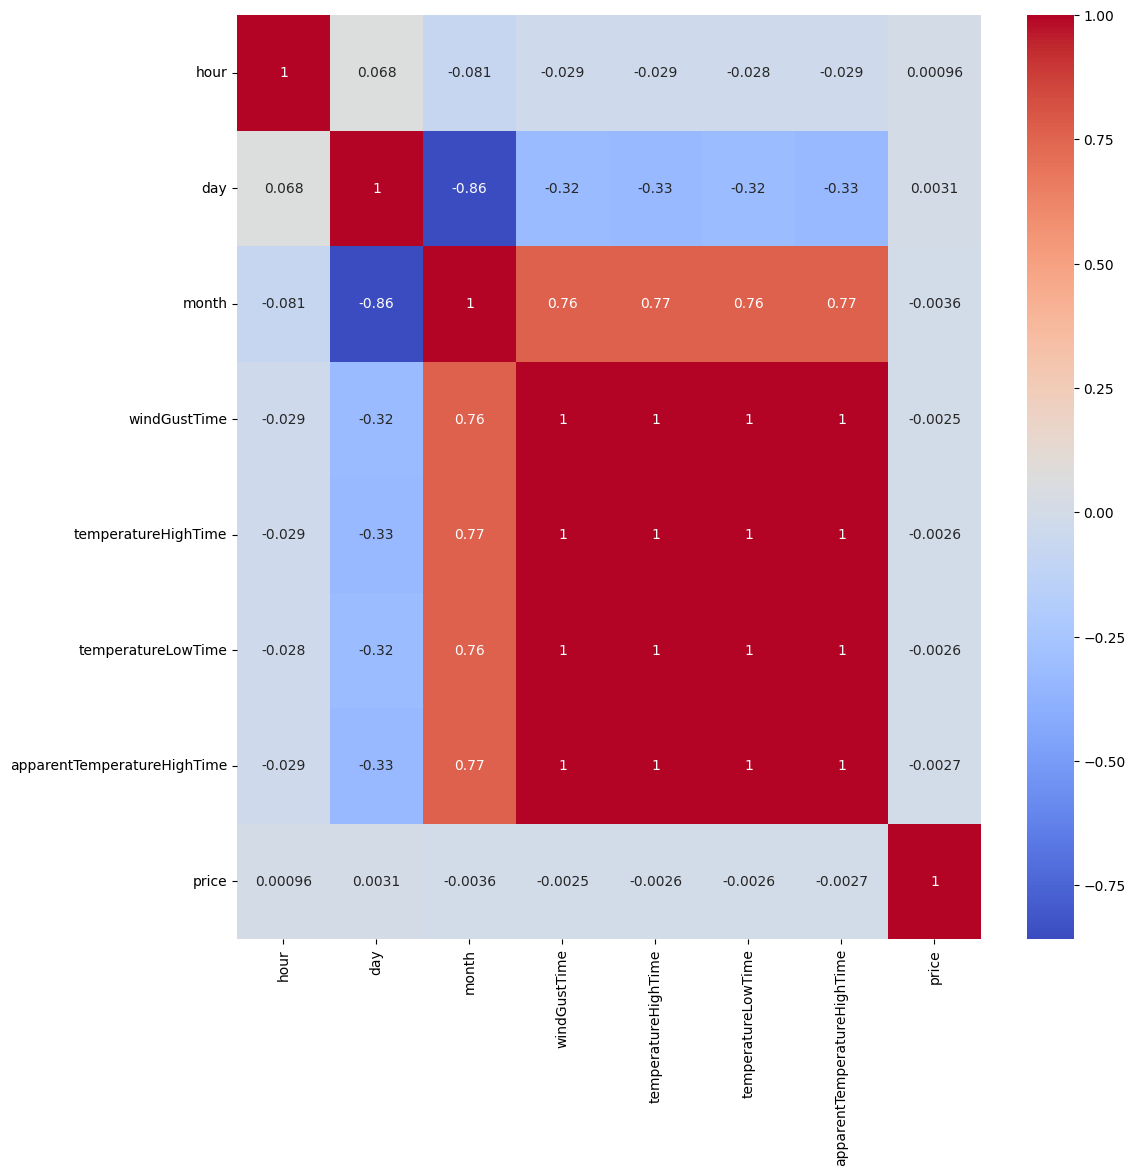

In [38]:

plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')

In [39]:
cor['price'].sort_values()

month                         -0.003568
apparentTemperatureHighTime   -0.002663
temperatureHighTime           -0.002645
temperatureLowTime            -0.002645
windGustTime                  -0.002541
hour                           0.000965
day                            0.003149
price                          1.000000
Name: price, dtype: float64

In [40]:
df.drop(['day', 'month', 'apparentTemperatureHighTime', 'temperatureHighTime','hour','windGustTime'],axis=1,inplace=True)
df

,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,...,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMaxTime
0,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.00,0.44,1.0,42.2148,-71.0330,...,1544994864,0.30,0.1276,1544979600,39.89,1545012000,1544968800,33.73,1545012000,1544958000
1,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.00,0.44,1.0,42.2148,-71.0330,...,1543266992,0.64,0.1300,1543251600,40.49,1543233600,1543251600,36.20,1543291200,1543251600
2,Haymarket Square,North Station,Lyft,lyft,Lyft,7.00,0.44,1.0,42.2148,-71.0330,...,1543353364,0.68,0.1064,1543338000,35.36,1543377600,1543320000,31.04,1543377600,1543320000
3,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.00,0.44,1.0,42.2148,-71.0330,...,1543526114,0.75,0.0000,1543507200,34.67,1543550400,1543510800,30.30,1543550400,1543510800
4,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.00,0.44,1.0,42.2148,-71.0330,...,1543439738,0.72,0.0001,1543420800,33.10,1543402800,1543420800,29.11,1543392000,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.00,1.00,1.0,42.3519,-71.0643,...,1543698855,0.82,0.0000,1543683600,31.42,1543658400,1543690800,27.77,1543658400,1543690800
693067,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.50,1.00,1.0,42.3519,-71.0643,...,1543698855,0.82,0.0000,1543683600,31.42,1543658400,1543690800,27.77,1543658400,1543690800
693068,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,16.77,1.00,1.0,42.3519,-71.0643,...,1543698855,0.82,0.0000,1543683600,31.42,1543658400,1543690800,27.77,1543658400,1543690800
693069,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.00,1.00,1.0,42.3519,-71.0643,...,1543698855,0.82,0.0000,1543683600,31.42,1543658400,1543690800,27.77,1543658400,1543690800


<Axes: >

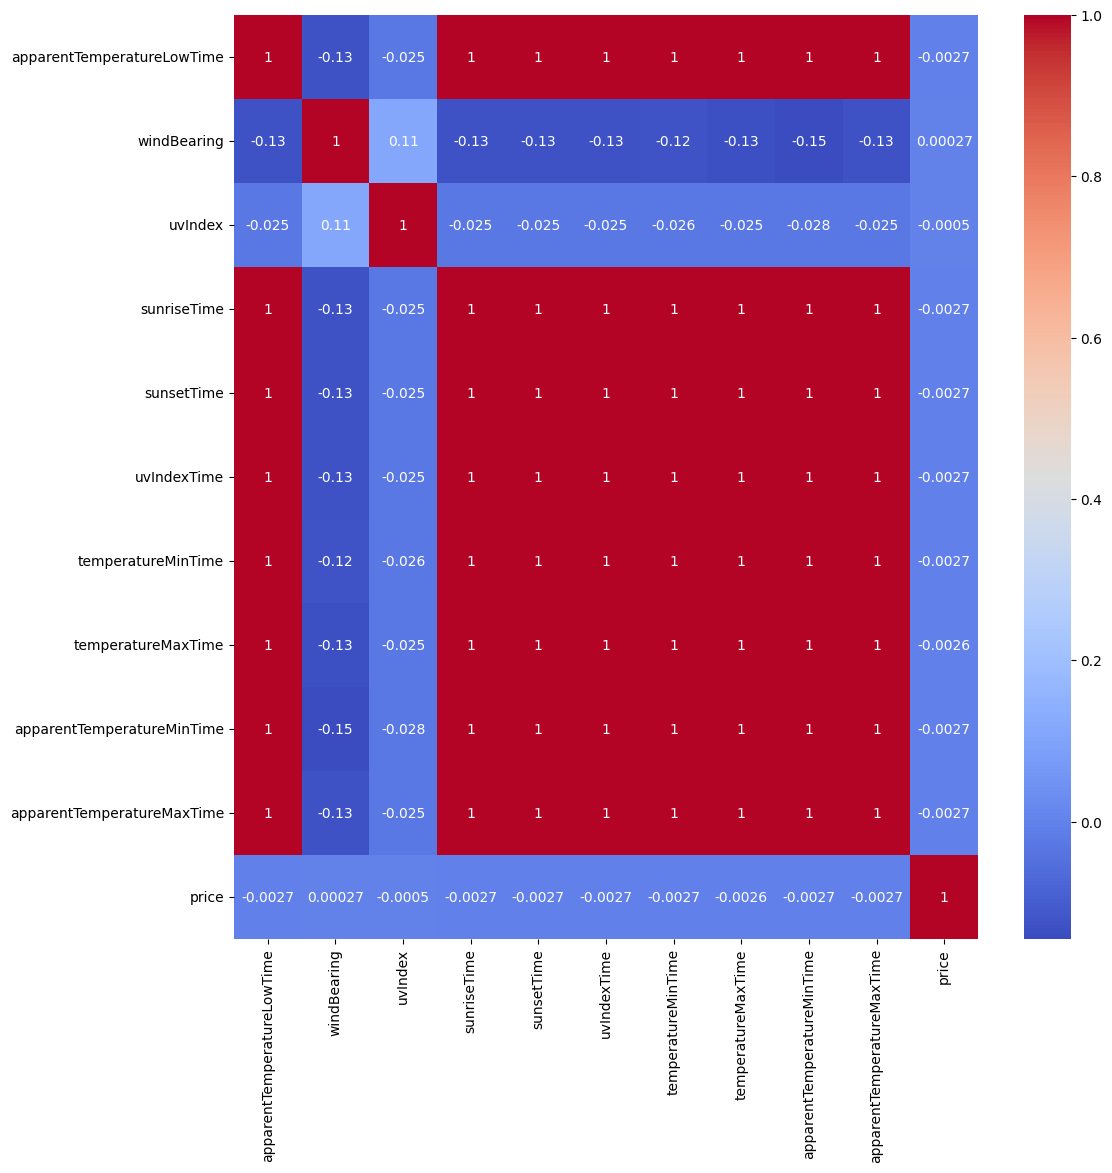

In [41]:
f_corr =['apparentTemperatureLowTime','windBearing','uvIndex','sunriseTime','sunsetTime','uvIndexTime',
         'temperatureMinTime','temperatureMaxTime','apparentTemperatureMinTime',
         'apparentTemperatureMaxTime', 'price']

cor = df[f_corr].corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')

In [42]:
cor['price'].sort_values()

temperatureMinTime           -0.002708
apparentTemperatureMinTime   -0.002707
uvIndexTime                  -0.002663
apparentTemperatureLowTime   -0.002662
sunriseTime                  -0.002660
sunsetTime                   -0.002660
apparentTemperatureMaxTime   -0.002655
temperatureMaxTime           -0.002633
uvIndex                      -0.000499
windBearing                   0.000266
price                         1.000000
Name: price, dtype: float64

In [43]:
df.drop(['uvIndex','windBearing','temperatureMaxTime','sunsetTime','sunriseTime' ,'uvIndexTime', 'apparentTemperatureMaxTime'],axis=1,inplace=True)
df

,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,...,dewPoint,pressure,cloudCover,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMinTime,apparentTemperatureMin,apparentTemperatureMinTime
0,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.00,0.44,1.0,42.2148,-71.0330,...,32.70,1021.98,0.72,303.8,0.30,0.1276,39.89,1545012000,33.73,1545012000
1,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.00,0.44,1.0,42.2148,-71.0330,...,41.83,1003.97,1.00,291.1,0.64,0.1300,40.49,1543233600,36.20,1543291200
2,Haymarket Square,North Station,Lyft,lyft,Lyft,7.00,0.44,1.0,42.2148,-71.0330,...,31.10,992.28,0.03,315.7,0.68,0.1064,35.36,1543377600,31.04,1543377600
3,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.00,0.44,1.0,42.2148,-71.0330,...,26.64,1013.73,0.00,291.1,0.75,0.0000,34.67,1543550400,30.30,1543550400
4,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.00,0.44,1.0,42.2148,-71.0330,...,28.61,998.36,0.44,347.7,0.72,0.0001,33.10,1543402800,29.11,1543392000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.00,1.00,1.0,42.3519,-71.0643,...,29.65,1023.57,0.31,271.5,0.82,0.0000,31.42,1543658400,27.77,1543658400
693067,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.50,1.00,1.0,42.3519,-71.0643,...,29.65,1023.57,0.31,271.5,0.82,0.0000,31.42,1543658400,27.77,1543658400
693068,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,16.77,1.00,1.0,42.3519,-71.0643,...,29.65,1023.57,0.31,271.5,0.82,0.0000,31.42,1543658400,27.77,1543658400
693069,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.00,1.00,1.0,42.3519,-71.0643,...,29.65,1023.57,0.31,271.5,0.82,0.0000,31.42,1543658400,27.77,1543658400


<Axes: >

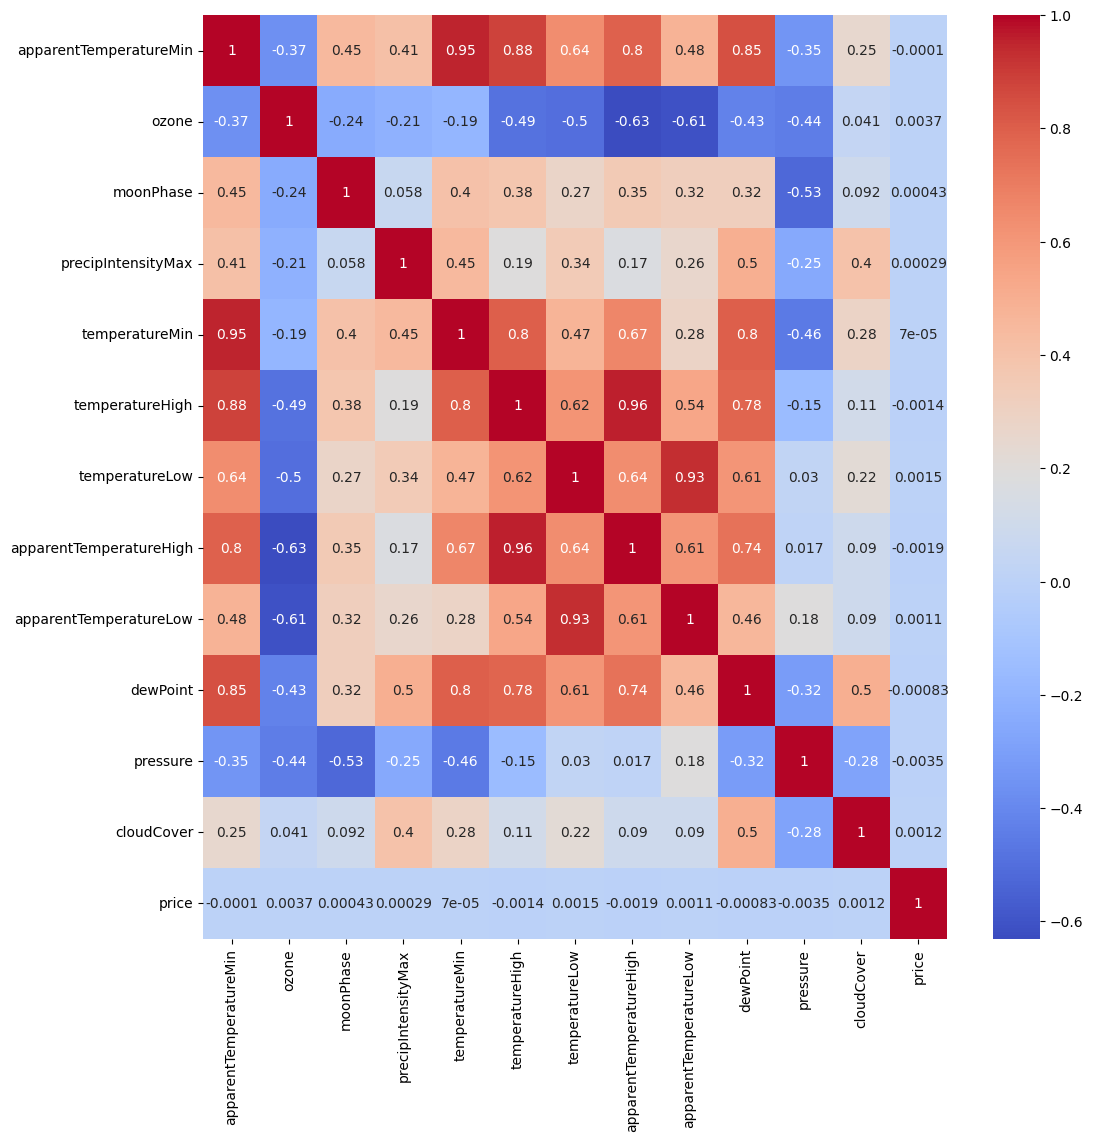

In [44]:
f_corr = ['apparentTemperatureMin','ozone',
 'moonPhase','precipIntensityMax','temperatureMin','temperatureHigh',
 'temperatureLow','apparentTemperatureHigh','apparentTemperatureLow',
          'dewPoint','pressure','cloudCover', 'price']
cor = df[f_corr].corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')

In [45]:
cor['price'].sort_values()

pressure                  -0.003480
apparentTemperatureHigh   -0.001861
temperatureHigh           -0.001449
dewPoint                  -0.000827
apparentTemperatureMin    -0.000101
temperatureMin             0.000070
precipIntensityMax         0.000292
moonPhase                  0.000432
apparentTemperatureLow     0.001140
cloudCover                 0.001199
temperatureLow             0.001474
ozone                      0.003722
price                      1.000000
Name: price, dtype: float64

In [46]:
df.drop(['temperatureHigh','precipIntensityMax', 'apparentTemperatureMin','apparentTemperatureLow','apparentTemperatureHigh','dewPoint','temperatureMin'],axis=1,inplace=True)
df

,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,...,temperatureLow,temperatureLowTime,apparentTemperatureLowTime,icon,pressure,cloudCover,ozone,moonPhase,temperatureMinTime,apparentTemperatureMinTime
0,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.00,0.44,1.0,42.2148,-71.0330,...,34.19,1545048000,1545044400,partly-cloudy-night,1021.98,0.72,303.8,0.30,1545012000,1545012000
1,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.00,0.44,1.0,42.2148,-71.0330,...,42.10,1543298400,1543291200,rain,1003.97,1.00,291.1,0.64,1543233600,1543291200
2,Haymarket Square,North Station,Lyft,lyft,Lyft,7.00,0.44,1.0,42.2148,-71.0330,...,33.10,1543402800,1543392000,clear-night,992.28,0.03,315.7,0.68,1543377600,1543377600
3,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.00,0.44,1.0,42.2148,-71.0330,...,28.90,1543579200,1543575600,clear-night,1013.73,0.00,291.1,0.75,1543550400,1543550400
4,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.00,0.44,1.0,42.2148,-71.0330,...,36.71,1543478400,1543460400,partly-cloudy-night,998.36,0.44,347.7,0.72,1543402800,1543392000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.00,1.00,1.0,42.3519,-71.0643,...,34.83,1543712400,1543712400,partly-cloudy-night,1023.57,0.31,271.5,0.82,1543658400,1543658400
693067,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.50,1.00,1.0,42.3519,-71.0643,...,34.83,1543712400,1543712400,partly-cloudy-night,1023.57,0.31,271.5,0.82,1543658400,1543658400
693068,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,16.77,1.00,1.0,42.3519,-71.0643,...,34.83,1543712400,1543712400,partly-cloudy-night,1023.57,0.31,271.5,0.82,1543658400,1543658400
693069,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.00,1.00,1.0,42.3519,-71.0643,...,34.83,1543712400,1543712400,partly-cloudy-night,1023.57,0.31,271.5,0.82,1543658400,1543658400


<Axes: >

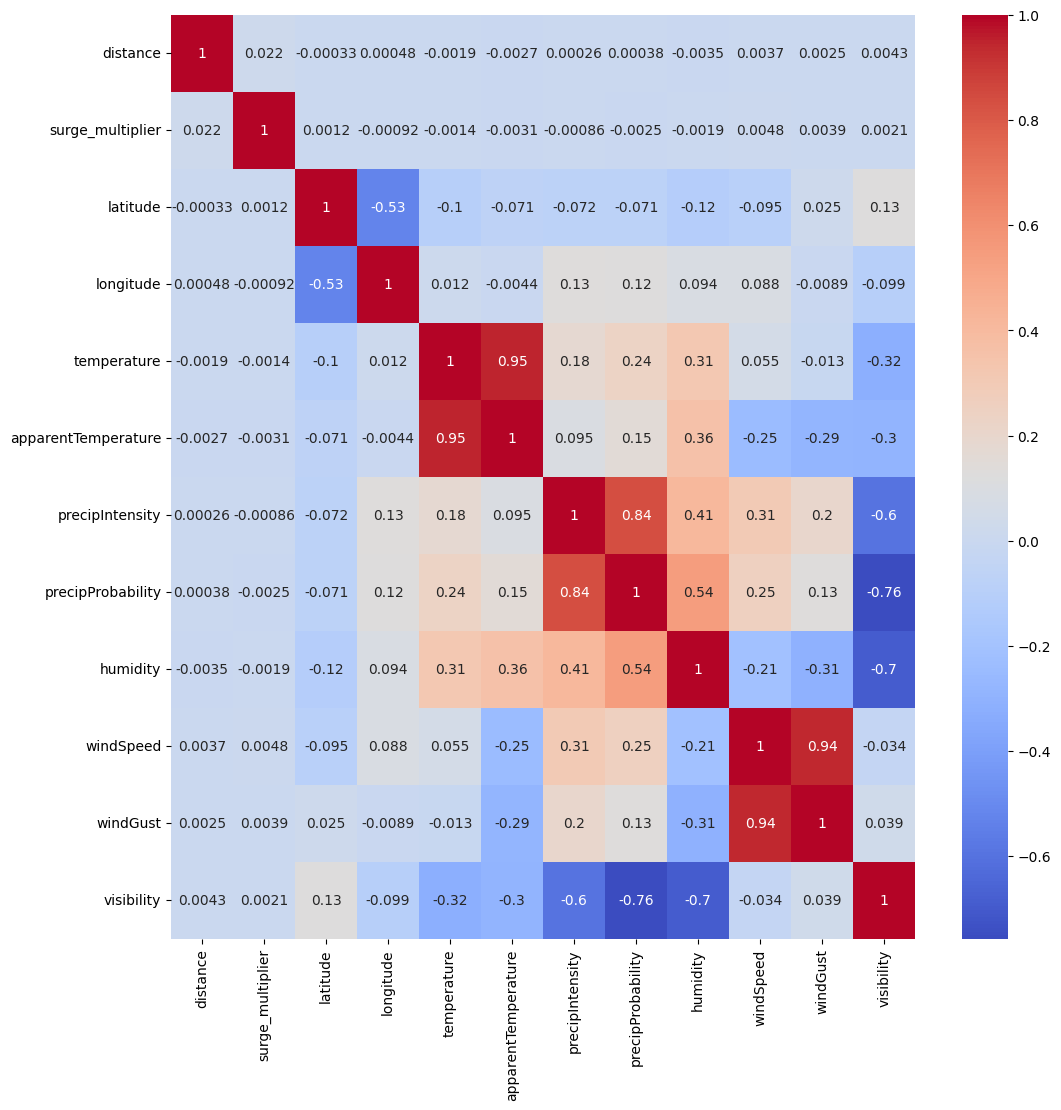

In [47]:
f_corr = ['distance','surge_multiplier','latitude','longitude','temperature','apparentTemperature',
 'precipIntensity','precipProbability','humidity','windSpeed','windGust','visibility']
cor = df[f_corr].corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')

In [48]:
if df[f_corr].isnull().values.any() or np.isinf(df[f_corr].values).any():
    print("Data contains NaNs or infinite values, which could cause blank spaces in heatmap.")
else:
    print("No NaNs or infinite values in the selected features.")

# Check data types of the columns
print("\nData types of the columns:")
print(df[f_corr].dtypes)

# Check for constant columns which can cause NaNs in correlation
constant_columns = [col for col in f_corr if df[col].nunique() == 1]
if constant_columns:
    print("\nThe following columns have a constant value and will not be included in the correlation matrix:")
    print(constant_columns)
    # Remove constant columns from the correlation
    f_corr = [col for col in f_corr if col not in constant_columns]

No NaNs or infinite values in the selected features.

Data types of the columns:
distance               float64
surge_multiplier       float64
latitude               float64
longitude              float64
temperature            float64
apparentTemperature    float64
precipIntensity        float64
precipProbability      float64
humidity               float64
windSpeed              float64
windGust               float64
visibility             float64
dtype: object


<Axes: >

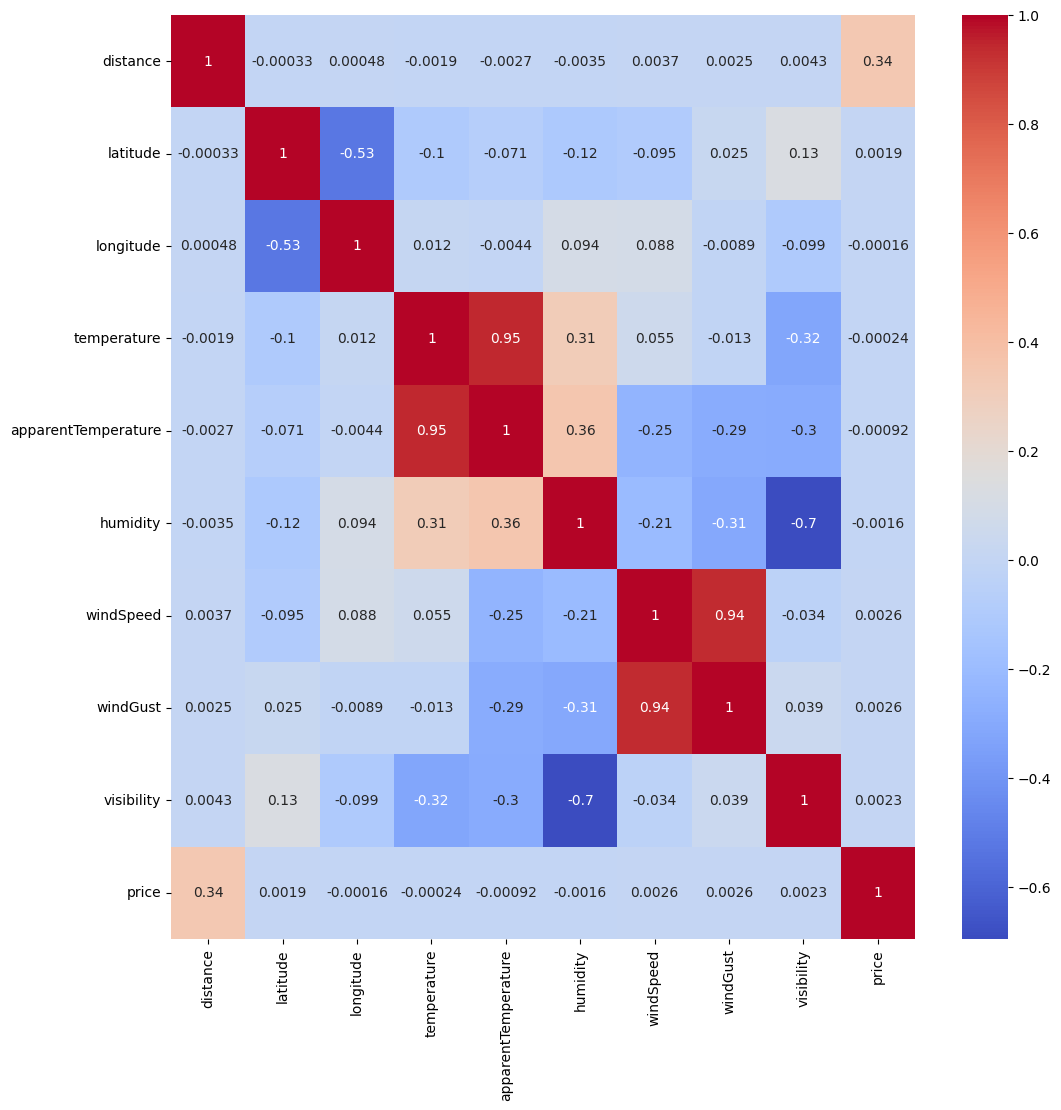

In [49]:
f_corr = ['distance','latitude','longitude','temperature','apparentTemperature',
 'humidity','windSpeed','windGust','visibility', 'price']
cor = df[f_corr].corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')

In [50]:
cor['price'].sort_values()

humidity              -0.001617
apparentTemperature   -0.000920
temperature           -0.000238
longitude             -0.000163
latitude               0.001892
visibility             0.002261
windSpeed              0.002626
windGust               0.002648
distance               0.338511
price                  1.000000
Name: price, dtype: float64

In [51]:
df.drop(['windSpeed', 'windGust','temperature', 'visibility','longitude','humidity', 'apparentTemperature','latitude'],axis=1,inplace=True)
df

,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,short_summary,precipIntensity,...,temperatureLow,temperatureLowTime,apparentTemperatureLowTime,icon,pressure,cloudCover,ozone,moonPhase,temperatureMinTime,apparentTemperatureMinTime
0,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.00,0.44,1.0,Mostly Cloudy,0.0000,...,34.19,1545048000,1545044400,partly-cloudy-night,1021.98,0.72,303.8,0.30,1545012000,1545012000
1,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.00,0.44,1.0,Rain,0.1299,...,42.10,1543298400,1543291200,rain,1003.97,1.00,291.1,0.64,1543233600,1543291200
2,Haymarket Square,North Station,Lyft,lyft,Lyft,7.00,0.44,1.0,Clear,0.0000,...,33.10,1543402800,1543392000,clear-night,992.28,0.03,315.7,0.68,1543377600,1543377600
3,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.00,0.44,1.0,Clear,0.0000,...,28.90,1543579200,1543575600,clear-night,1013.73,0.00,291.1,0.75,1543550400,1543550400
4,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.00,0.44,1.0,Partly Cloudy,0.0000,...,36.71,1543478400,1543460400,partly-cloudy-night,998.36,0.44,347.7,0.72,1543402800,1543392000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.00,1.00,1.0,Partly Cloudy,0.0000,...,34.83,1543712400,1543712400,partly-cloudy-night,1023.57,0.31,271.5,0.82,1543658400,1543658400
693067,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.50,1.00,1.0,Partly Cloudy,0.0000,...,34.83,1543712400,1543712400,partly-cloudy-night,1023.57,0.31,271.5,0.82,1543658400,1543658400
693068,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,16.77,1.00,1.0,Partly Cloudy,0.0000,...,34.83,1543712400,1543712400,partly-cloudy-night,1023.57,0.31,271.5,0.82,1543658400,1543658400
693069,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.00,1.00,1.0,Partly Cloudy,0.0000,...,34.83,1543712400,1543712400,partly-cloudy-night,1023.57,0.31,271.5,0.82,1543658400,1543658400


In [52]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for i in categorical_cols:
    df[i] = encoder.fit_transform(df[i])

In [53]:
df

,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,short_summary,precipIntensity,...,temperatureLow,temperatureLowTime,apparentTemperatureLowTime,icon,pressure,cloudCover,ozone,moonPhase,temperatureMinTime,apparentTemperatureMinTime
0,5,7,0,8,7,5.00,0.44,1.0,4,0.0000,...,34.19,1545048000,1545044400,5,1021.98,0.72,303.8,0.30,1545012000,1545012000
1,5,7,0,12,2,11.00,0.44,1.0,8,0.1299,...,42.10,1543298400,1543291200,6,1003.97,1.00,291.1,0.64,1543233600,1543291200
2,5,7,0,7,5,7.00,0.44,1.0,0,0.0000,...,33.10,1543402800,1543392000,1,992.28,0.03,315.7,0.68,1543377600,1543377600
3,5,7,0,10,4,26.00,0.44,1.0,0,0.0000,...,28.90,1543579200,1543575600,1,1013.73,0.00,291.1,0.75,1543550400,1543550400
4,5,7,0,11,6,9.00,0.44,1.0,6,0.0000,...,36.71,1543478400,1543460400,5,998.36,0.44,347.7,0.72,1543402800,1543392000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,11,6,1,3,11,13.00,1.00,1.0,6,0.0000,...,34.83,1543712400,1543712400,5,1023.57,0.31,271.5,0.82,1543658400,1543658400
693067,11,6,1,0,10,9.50,1.00,1.0,6,0.0000,...,34.83,1543712400,1543712400,5,1023.57,0.31,271.5,0.82,1543658400,1543658400
693068,11,6,1,4,8,16.77,1.00,1.0,6,0.0000,...,34.83,1543712400,1543712400,5,1023.57,0.31,271.5,0.82,1543658400,1543658400
693069,11,6,1,2,1,27.00,1.00,1.0,6,0.0000,...,34.83,1543712400,1543712400,5,1023.57,0.31,271.5,0.82,1543658400,1543658400


In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [55]:
f = ['distance','surge_multiplier','name','cab_type']
X = df[f]
Y = df['price']

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42)

In [57]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
lr = RandomForestRegressor()
lr.fit(X_train, Y_train)

RandomForestRegressor()

In [59]:
y_pred = lr.predict(X_test)

In [60]:
print("Measuring on Testing set.\n")
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(Y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

#Calculating Mean Squared Error
MSEValue = mean_squared_error(Y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

#Calculating r2_score
r2_scorevalue = r2_score(Y_test, y_pred)
print('r2_score is : ', r2_scorevalue )

Measuring on Testing set.

Mean Absolute Error Value is :  1.1156547346227443
Mean Squared Error Value is :  3.0932831029664185
r2_score is :  0.9633728858743311


In [67]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [64]:
y_pred = lr.predict(X_test)

In [65]:
print("Measuring on Testing set.\n")
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(Y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

#Calculating Mean Squared Error
MSEValue = mean_squared_error(Y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

#Calculating r2_score
r2_scorevalue = r2_score(Y_test, y_pred)
print('r2_score is : ', r2_scorevalue )

Measuring on Testing set.

Mean Absolute Error Value is :  5.150377807178535
Mean Squared Error Value is :  42.67798237387053
r2_score is :  0.49465623448368456
